In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
import tidy3d.web as web

# --- 1. Material Definitions ---
# Using fixed indices for 1550nm for simplicity

wavelength =  1.55                              # Central wavelength
wv_points = 3                                   # number of wavelength wv_points
width = 0.35
n_si = 3.475
n_sio2 = 1.458

sweep_wavelength = np.linspace(1.5,1.6,wv_points)  # Sweep on wavelengths
sweep_freq = td.C_0 / sweep_wavelength          # Sweep on Frequencies
bandwidth = sweep_wavelength[-1]-sweep_wavelength[0]

mat_si = td.material_library["cSi"]["Li1993_293K"] # Material trace permitivity model for crystaline Silicon
mat_sio2 = td.material_library["SiO2"]["Horiba"]   # Material trace permitivity model for crystaline Silica


web.configure("U7IS5Q1AW3qYVxPAAQDE7vgxaTz6Kt6aI9AioPZUajVRQQ2o")

Configuration saved successfully.


In [39]:

# def extract_nonzero_columns(padded_array):
#     """
#     Extracts the non-zero contiguous part of each column in a
#     zero-padded 2D array.
#
#     Parameters
#     ----------
#     padded_array : np.ndarray
#         2D array where each column is zero-padded but contains
#         a contiguous block of non-zero values.
#
#     Returns
#     -------
#     list_of_arrays : list of np.ndarray
#         List containing 1D arrays ready for plotting.
#     """
#
#     padded_array = np.asarray(padded_array)
#
#     if padded_array.ndim != 2:
#         raise ValueError("Input must be a 2D array.")
#
#     extracted = []
#
#     for col in padded_array.T:  # iterate over columns
#
#         nonzero_indices = np.nonzero(col)[0]
#
#         if len(nonzero_indices) == 0:
#             extracted.append(np.array([]))
#         else:
#             start = nonzero_indices[0]
#             end = nonzero_indices[-1] + 1
#             extracted.append(col[start:end])
#
#     return extracted
#
#
# def count_nonzero_per_row(padded_array):
#     """
#     Counts the number of non-zero elements in each row
#     of a 2D array.
#
#     Parameters
#     ----------
#     padded_array : np.ndarray
#         2D array possibly containing zero padding.
#
#     Returns
#     -------
#     counts : np.ndarray
#         1D array containing the number of non-zero
#         elements in each row.
#     """
#
#     padded_array = np.asarray(padded_array)
#
#     if padded_array.ndim != 2:
#         raise ValueError("Input must be a 2D array.")
#
#     counts = np.count_nonzero(padded_array, axis=1)
#
#     return counts

def build_slot_simulation(
    gap=0.15,
    width=0.350,
    thickness=0.22,
    wavelength = np.array([1.55]),
):

    # Frequency
    freq = td.C_0 / wavelength

    # Materials
    core = mat_si
    clad = mat_sio2

    # --- Define two silicon rails ---
    rail_offset = width/2 + gap/2

    rail_right = td.Structure(
        geometry=td.Box(
            center=(0, rail_offset, thickness/2),
            size=(td.inf, width, thickness),
        ),
        medium=core,
    )

    rail_left = td.Structure(
        geometry=td.Box(
            center=(0, -rail_offset, thickness/2),
            size=(td.inf, width, thickness),
        ),
        medium=core,
    )


    #--- Define Sources ---
    freq0 = td.C_0 / wavelength.mean()
    fwidth = (td.C_0 / wavelength.min()) - (td.C_0 / wavelength.max())

    source1 = td.ModeSource(
    center = [-7.5, width / 2 + gap / 2, thickness / 2],
    size = [0, width + gap / 2, thickness + 0.5],
    source_time = td.GaussianPulse(freq0 = freq0, fwidth =fwidth, ),
    direction = '+',
    mode_index=0,
    mode_spec= td.ModeSpec(num_modes=5,target_neff=n_si),
    )


    # --- Define monitors ---

    Through = td.FieldMonitor(
    name="Through",
    center = [0, rail_offset, thickness / 2],
    size = [0, width + gap / 2, thickness + 0.5],
    freqs = freq,
    )

    Cross = td.FieldMonitor(
    name="Cross",
    center = [0, -rail_offset, thickness / 2],
    size = [0, width + gap / 2, thickness + 0.5],
    freqs = freq,
    )


    Both = td.FieldMonitor(
    name="Both",
    size = [0, 2, 2],
    freqs = freq,
    )

    Longitudinal = td.FieldMonitor(
        name="Longitudinal",
        size = [16, 7.75, 0],
        freqs = freq,
    )

    # --- Simulation domain ---
    sim = td.Simulation(
        size=(15.5, 15.5, 15.5),  # x ignored for mode solver
        monitors=[Cross,Through,Longitudinal,Both],
        sources=[source1],
        structures=[rail_right, rail_left],
        medium=clad,
        # symmetry=(0, 1, 0),  # symmetry in y (even supermode)
        run_time=1e-12,
        grid_spec=td.GridSpec.auto(wavelength = wavelength.min(),min_steps_per_wvl = 25),
    )

    sim_data = web.run(sim, task_name='DC_FDTD')

    return sim_data, sim


sim_data, sim = build_slot_simulation(wavelength=sweep_wavelength)

Cross_mon = sim_data["Cross"]
Through_mon = sim_data["Through"]
Both_mon = sim_data["Both"]
Longitudinal_mon = sim_data["Longitudinal"]




23:14:51 Hora est. Pacífico, Sudamérica Created task 'DC_FDTD' with resource_id 
                                        'fdve-de9b7c95-76ff-479f-b09b-4c91452bb5
                                        71' and task_type 'FDTD'.

                                        View task using web UI at               
                                        ]8;id=328856;https://tidy3d.simulation.cloud/workbench?taskId=fdve-de9b7c95-76ff-479f-b09b-4c91452bb571\'https://tidy3d.simulation.cloud/workben]8;;\
                                        ]8;id=328856;https://tidy3d.simulation.cloud/workbench?taskId=fdve-de9b7c95-76ff-479f-b09b-4c91452bb571\ch?]8;;\]8;id=274792;https://tidy3d.simulation.cloud/workbench?taskId=fdve-de9b7c95-76ff-479f-b09b-4c91452bb571\taskId]8;;\]8;id=328856;https://tidy3d.simulation.cloud/workbench?taskId=fdve-de9b7c95-76ff-479f-b09b-4c91452bb571\=]8;;\]8;id=920516;https://tidy3d.simulation.cloud/workbench?taskId=fdve-de9b7c95-76ff-479f-b09b-4c91452bb571\fdve]8;;\]8;id=328856;https://tidy3d.simulation.cloud/workbench?taskId=fdve-de9b7c95-76ff-479f-b09b-4c91452bb571\-de9b7c95-76ff-479f-b09b-4]8;;\
                                        ]8;id=328856;https://tidy3d.simulation.cloud/workbench?taskId=fdve-de9b7c95-76ff-479f-b09b-4c91452bb571\c91452bb571']8;;\.

                                        Task folder: ]8;id=461181;https://tidy3d.simulation.cloud/folders/folder-6a6c7c15-3e31-4e28-8c62-ab0ed77742eb\'default']8;;\.

D:\GitHub\GDS_py_TDY_venv\.venv\Lib\site-packages\rich\live.py:231: UserWarning:
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

23:14:53 Hora est. Pacífico, Sudamérica Estimated FlexCredit cost: 2.622.       
                                        Minimum cost depends on task execution  
                                        details. Use 'web.real_cost(task_id)' to
                                        get the billed FlexCredit cost after a  
                                        simulation run.

23:14:55 Hora est. Pacífico, Sudamérica status = success

23:15:00 Hora est. Pacífico, Sudamérica Loading simulation from                 
                                        simulation_data.hdf5

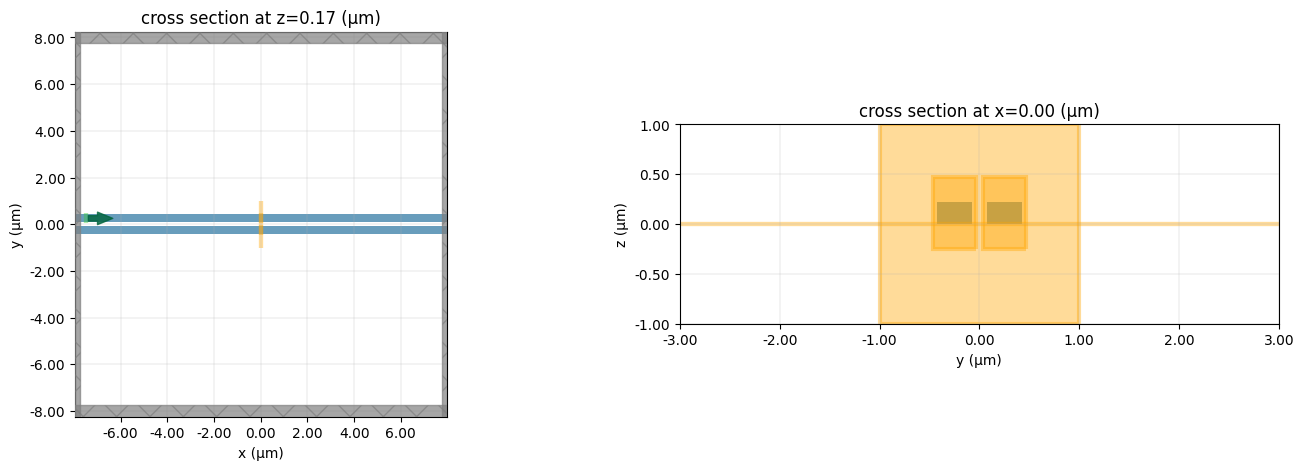

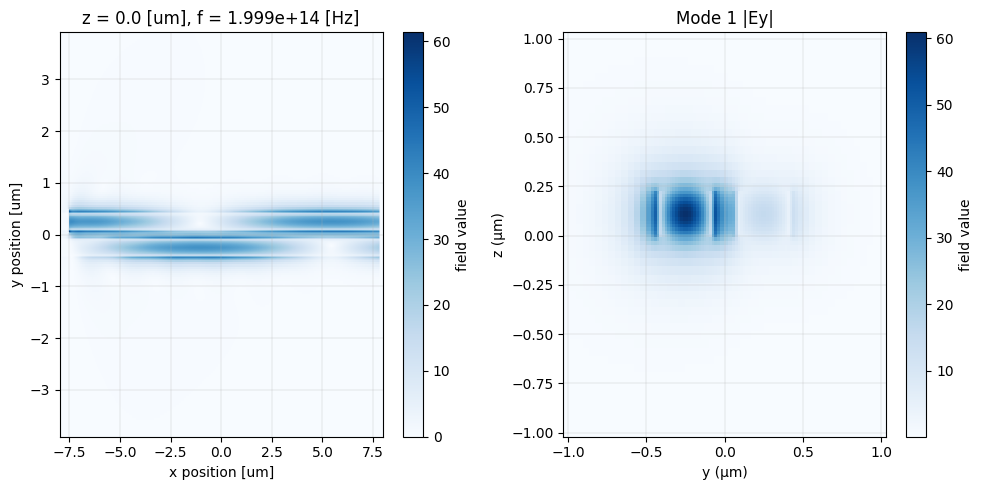

attrs={} type='FieldData' Ex=<xarray.ScalarFieldDataArray (x: 1, y: 82, z: 61, f: 3)> Size: 120kB
array([[[[ 0.06868161+0.00343033j, -0.03465194-0.0744446j ,
          -0.07436422+0.03751409j],
         [ 0.06864502-0.00053375j, -0.04211519-0.07180894j,
          -0.07005733+0.04069292j],
         [ 0.06838721-0.00412392j, -0.0498034 -0.068793j  ,
          -0.06535721+0.04298982j],
         ...,
         [ 0.06415135-0.01205969j, -0.09675519-0.04749871j,
          -0.03437771+0.03656823j],
         [ 0.06476731-0.01220058j, -0.08595051-0.05209458j,
          -0.04098435+0.04089558j],
         [ 0.06541264-0.01131733j, -0.07612476-0.05639676j,
          -0.0471876 +0.04358632j]],

        [[ 0.06837317+0.00130234j, -0.03773107-0.07275698j,
          -0.07175094+0.03861547j],
         [ 0.06816602-0.00253509j, -0.04534569-0.06986615j,
          -0.06715295+0.04139624j],
         [ 0.06774686-0.00593812j, -0.05324705-0.06659039j,
          -0.06214519+0.04320883j],
...
          -0.09474

In [42]:
fig0, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))

sim.plot(z = width/ 2, lw=1, ax=ax1)
sim.plot(x=0, lw=1, ax=ax2)

ax2.set_xlim([-3, 3])
_ = ax2.set_ylim([-1, 1])

ax1.grid(True,linewidth = 0.2)
ax2.grid(True,linewidth = 0.2)
plt.show()



mode_index = 1

# Extract field


fig1,axes = plt.subplots(nrows=1, ncols=2,  figsize=(10,5))
# data.Ey.real.isel(mode_index = mode_index).squeeze().plot(ax = axes,x = 'y', y = 'z', cmap= 'RdBu_r',vmin = -60,vmax = 60)
Longitudinal_mon.Ey.abs.isel(f = 0).squeeze().plot(ax = axes[0],x = 'x', y = 'y', cmap= "Blues")
Both_mon.Ey.abs.isel(f = 0).squeeze().plot(ax = axes[1],x = 'y', y = 'z', cmap= "Blues")

plt.xlabel("y (μm)")
plt.ylabel("z (μm)")
plt.title(f"Mode {mode_index} |Ey|")
plt.tight_layout()
axes[0].grid(True,linewidth = 0.2)
axes[1].grid(True,linewidth = 0.2)
plt.show()

print(Both_mon)



